# EDA on IMDB most popular Films and series

IMDB is a popular website for rating films and series. I always go there if I want to watch something new, and many users trust its rankings. The data is about the most famous 6k+ Films and series on IMDB with rates. The Data is Perfect for Exploratory Data Analysis. I got this data from [Kaggle](https://www.kaggle.com/mazenramadan/imdb-most-popular-films-and-series). 
I would like to do EDA. Want to find answers to some interesting questions. Todo, I am using Pandas and NumPy for data storage and processing, and for visualization, I am using Matplotlib and Seaborn.

One of the best sources I came across to do all the mentioned above is [Data Analysis with Python: Zero to Pandas](zerotopandas.com). I learned the basics of Python, Pandas, NumPy, and visualization tools like Matplotlid and Seaborn.


## Downloading the Dataset

The dataset have 6178 rows and 14 columns. Column description given below.


###### Name: Name of the film/series
###### Data: Creation date
###### Rate: IMDB's Rate
###### Votes: Number of voters
###### Genre: Genres , Actions , Drama, Romance, etc…
###### Duration: Duration of the episode , film
###### Type: whether it's film or series
###### Certificate:
        TV-Y: Designed to be appropriate for all children
        TV-Y7: Suitable for ages 7 and up
        G: Suitable for General Audiences
        TV-G: Suitable for General Audiences
        PG: Parental Guidance suggested
        TV-PG: Parental Guidance suggested
        PG-13: Parents strongly cautioned. May be Inappropriate for ages 12 and under.
        TV-14: Parents strongly cautioned. May not be suitable for ages 14 and under.
        R: Restricted. May be inappropriate for ages 17 and under.
        TV-MA: For Mature Audiences. May not be suitable for ages 17 and under.
        NC-17: Inappropriate for ages 17 and under
###### Episodes: Number of Episodes only for series
###### Nudity, Violence, Profanity, Alcohol, and Frightening :How much does it have of these

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/mazenramadan/imdb-most-popular-films-and-series' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdulazizmd
Your Kaggle Key: ········


100%|██████████| 167k/167k [00:00<00:00, 58.7MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './imdb-most-popular-films-and-series'

In [5]:
import os
os.listdir(data_dir)

['imdb.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "eda_imdb_movies_series-aziz" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

<IPython.core.display.Javascript object>

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "azizforai/eda-imdb-movies-series-aziz" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/azizforai/eda-imdb-movies-series-aziz


'https://jovian.ai/azizforai/eda-imdb-movies-series-aziz'

## Data Preparation and Cleaning

Data Cleaning is an important step and time-consuming step in data analysis. Formatting issues (e.g., rows and columns merged), missing data, duplicated rows, spelling discrepancies, and so on could all be present. These challenges could make data analysis complex, ending in errors or unsuitable results. As a result, these points must be addressed before data can be analyzed. 



In [10]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

In [11]:
#load dataset
Imdb_df = pd.read_csv("./imdb-most-popular-films-and-series/imdb.csv")
Imdb_df

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,-,None,None,Mild,Moderate,None


In [12]:
Imdb_df.shape

(6178, 14)

In [13]:
Imdb_df.columns

Index(['Name', 'Date', 'Rate', 'Votes', 'Genre', 'Duration', 'Type',
       'Certificate', 'Episodes', 'Nudity', 'Violence', 'Profanity', 'Alcohol',
       'Frightening'],
      dtype='object')

In [14]:
Imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         6178 non-null   object
 1   Date         6178 non-null   int64 
 2   Rate         6178 non-null   object
 3   Votes        6178 non-null   object
 4   Genre        6178 non-null   object
 5   Duration     6178 non-null   object
 6   Type         6178 non-null   object
 7   Certificate  6178 non-null   object
 8   Episodes     6178 non-null   object
 9   Nudity       6178 non-null   object
 10  Violence     6178 non-null   object
 11  Profanity    6178 non-null   object
 12  Alcohol      6178 non-null   object
 13  Frightening  6178 non-null   object
dtypes: int64(1), object(13)
memory usage: 675.8+ KB


In [15]:
#Used for calculating some statistical data like percentile, mean and std of the numerical values
Imdb_df.describe()

,Date
count,6178.000000
mean,2005.952574
std,15.910248
min,1922.000000
25%,1998.000000
50%,2011.000000
75%,2019.000000
max,2023.000000


describe() applies only on numerical features. So we did not able to see the description of "Rate", "Votes", and "Duration" as the type of those features are object. In data cleaning process we convert "Rate", "Votes", and "Duration" features to numeric for better understanding about data.

In [16]:
#This will include count, unique, top and freq. The top is the most common value. The freq is the most common value’s frequency.
Imdb_df.describe(include = 'object')

,Name,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
count,6178,6178,6178,6178,6178,6178,6178,6178,6178,6178,6178,6178,6178
unique,4820,77,4802,377,203,2,23,284,5,5,5,5,5
top,King Kong,7.3,No Votes,Comedy,60,Film,R,-,Mild,Moderate,Mild,Mild,Moderate
freq,5,273,185,268,352,4446,1885,4446,2292,1814,2077,3257,1969


In [17]:
Fre = Imdb_df.loc[Imdb_df.Name=='King Kong'] 
Fre

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
2084,King Kong,2005,7.2,"407,876","Action, Adventure, Drama",187,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
4207,King Kong,1976,5.9,"31,536","Adventure, Horror",134,Film,PG,-,Mild,Moderate,Mild,Mild,Moderate
4951,King Kong,1933,7.9,"82,705","Adventure, Horror, Sci-Fi",100,Film,Passed,-,Mild,Moderate,None,Mild,Moderate
5357,King Kong,1976,5.9,"31,536","Adventure, Horror",134,Film,PG,-,Mild,Moderate,Mild,Mild,Moderate
6101,King Kong,1933,7.9,"82,705","Adventure, Horror, Sci-Fi",100,Film,Passed,-,Mild,Moderate,None,Mild,Moderate


By the description of "Name" feature, thaught "King Kong" is duplicated row. But it is not with the above output.

In [18]:
#Finding Columns with Missing Values
Imdb_df.isna().any()

Name           False
Date           False
Rate           False
Votes          False
Genre          False
Duration       False
Type           False
Certificate    False
Episodes       False
Nudity         False
Violence       False
Profanity      False
Alcohol        False
Frightening    False
dtype: bool

As of now, the features are not having missing values. Let's see it after couple of steps again.

The features "Rate", "Votes", and "Duration" should be numeric. So convert the type of respective features to numeric.

In a given dataset Votes are given as 107,163 (comma supprated value). To change the type of "Votes" feature, first I am converting 107,163 type of values to 107163 by the below code.

In [19]:
for i in range(0,Imdb_df.shape[0]):
  Imdb_df['Votes'][i] = Imdb_df['Votes'][i].replace(',', '')

In [20]:
Imdb_df['Votes']

0       107163
1        64375
2        27145
3        30443
4        84636
         ...  
6173     37492
6174    150448
6175    100668
6176       887
6177    203578
Name: Votes, Length: 6178, dtype: object

In [21]:
Imdb_df['Rate'] = pd.to_numeric(Imdb_df['Rate'], errors='coerce', downcast="integer")
Imdb_df['Votes'] = pd.to_numeric(Imdb_df['Votes'], errors='coerce', downcast="integer")
Imdb_df['Duration'] = pd.to_numeric(Imdb_df['Duration'], errors='coerce', downcast="integer")

In [22]:
Imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6178 non-null   object 
 1   Date         6178 non-null   int64  
 2   Rate         5993 non-null   float64
 3   Votes        5993 non-null   float64
 4   Genre        6178 non-null   object 
 5   Duration     5877 non-null   float64
 6   Type         6178 non-null   object 
 7   Certificate  6178 non-null   object 
 8   Episodes     6178 non-null   object 
 9   Nudity       6178 non-null   object 
 10  Violence     6178 non-null   object 
 11  Profanity    6178 non-null   object 
 12  Alcohol      6178 non-null   object 
 13  Frightening  6178 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 675.8+ KB


Now the features "Rate", "Votes", and "Duration" are of numeric type.

In [23]:
Imdb_df.isnull().sum()

Name             0
Date             0
Rate           185
Votes          185
Genre            0
Duration       301
Type             0
Certificate      0
Episodes         0
Nudity           0
Violence         0
Profanity        0
Alcohol          0
Frightening      0
dtype: int64

In [ ]:
Oops! Now the features "Rate", "Votes", and "Duration" having missing values as 'NaN'. 
Clean the NaN values by imputing 0 inplace of 'NaN'.

In [24]:
Imdb_df['Rate'] = Imdb_df['Rate'].replace(np.nan, 0)
Imdb_df['Votes'] = Imdb_df['Votes'].replace(np.nan, 0)
Imdb_df['Duration'] = Imdb_df['Duration'].replace(np.nan, 0)

In [25]:
Imdb_df.isnull().sum()

Name           0
Date           0
Rate           0
Votes          0
Genre          0
Duration       0
Type           0
Certificate    0
Episodes       0
Nudity         0
Violence       0
Profanity      0
Alcohol        0
Frightening    0
dtype: int64

In [26]:
#Again describe
Imdb_df.describe()

,Date,Rate,Votes,Duration
count,6178.000000,6178.000000,6.178000e+03,6178.000000
mean,2005.952574,6.670751,1.186994e+05,89.969084
std,15.910248,1.584147,1.912752e+05,45.541366
min,1922.000000,0.000000,0.000000e+00,0.000000
25%,1998.000000,6.200000,1.221275e+04,60.000000
50%,2011.000000,6.900000,5.364250e+04,98.000000
75%,2019.000000,7.600000,1.437282e+05,115.000000
max,2023.000000,9.700000,2.474122e+06,900.000000


In [27]:

Imdb_df.describe(include = 'object')

,Name,Genre,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
count,6178,6178,6178,6178,6178,6178,6178,6178,6178,6178
unique,4820,377,2,23,284,5,5,5,5,5
top,King Kong,Comedy,Film,R,-,Mild,Moderate,Mild,Mild,Moderate
freq,5,268,4446,1885,4446,2292,1814,2077,3257,1969


In [95]:
#Df = Imdb_df.drop_duplicates(inplace = True)
#Df = Imdb_df.copy()

In [97]:
#Df.drop_duplicates(inplace = True)

In [28]:
#Df.describe(include = 'object')

In [29]:
#Fre = Df.loc[Df.Name=='Robin Hood'] 
#Fre

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "azizforai/eda-imdb-movies-series-aziz" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/azizforai/eda-imdb-movies-series-aziz


'https://jovian.ai/azizforai/eda-imdb-movies-series-aziz'

## Exploratory Analysis and Visualization

In EDA, visualization is very important. Raw text or numbers can not speak much but figures definitely gives more insights about data.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [32]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [34]:
Imdb_df.head(5)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163.0,"Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375.0,"Crime, Drama, Thriller",90.0,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,27145.0,"Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443.0,"Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636.0,"Action, Adventure, Drama",155.0,Film,PG-13,-,None,Moderate,None,Mild,Moderate


# Let's do Univariate Analysis

1) Year wise movies and web series count.

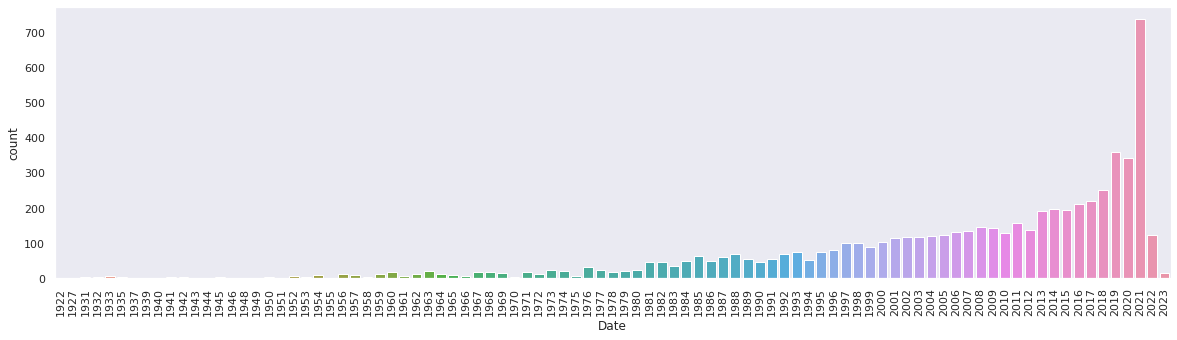

In [36]:
plt.figure(figsize=(20,5))
sns.set(style='dark')
sns.countplot(Imdb_df['Date'].sort_values(ascending=False))
plt.xticks(rotation=90)
plt.show()

It shows that more movies and web series are released in 2021 (around 700+).

<AxesSubplot:xlabel='Rate', ylabel='Count'>

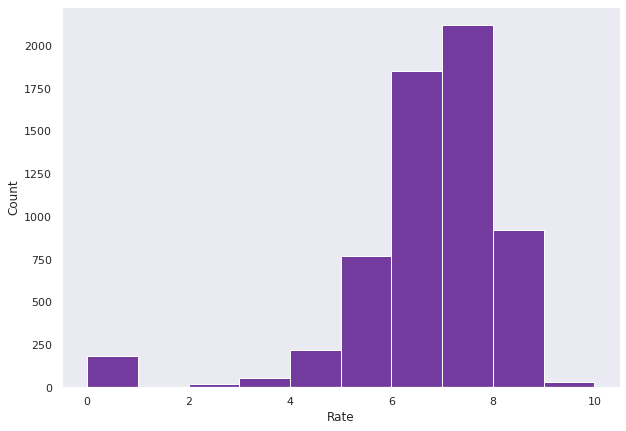

In [102]:
plt.figure(figsize=(10,7))
sns.set(style='dark')
sns.histplot(data=Imdb_df,x='Rate',color='indigo',binwidth=1)

Rating distribution for Imdb_df dataframe between 6 to 8.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'R'),
  Text(2, 0, 'TV-MA'),
  Text(3, 0, 'None'),
  Text(4, 0, 'TV-14'),
  Text(5, 0, 'TV-PG'),
  Text(6, 0, 'PG'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, '(Banned)'),
  Text(9, 0, 'Not Rated'),
  Text(10, 0, 'E'),
  Text(11, 0, 'NC-17'),
  Text(12, 0, 'TV-Y7-FV'),
  Text(13, 0, 'TV-Y7'),
  Text(14, 0, 'Unrated'),
  Text(15, 0, 'Approved'),
  Text(16, 0, 'G'),
  Text(17, 0, 'TV-Y'),
  Text(18, 0, 'GP'),
  Text(19, 0, 'Passed'),
  Text(20, 0, 'M'),
  Text(21, 0, 'X'),
  Text(22, 0, 'M/PG')])

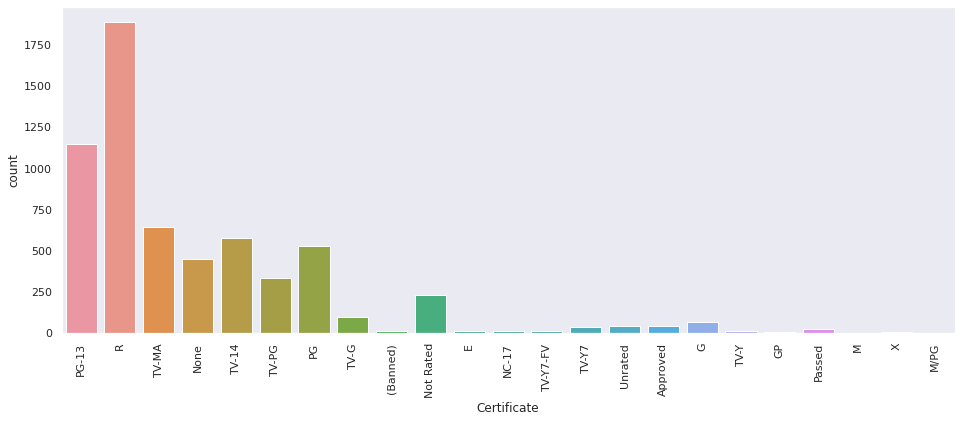

In [38]:
plt.figure(figsize=(16, 6))
plot = sns.countplot(x='Certificate', data=Imdb_df);
plt.xticks(rotation = 90)

Gripping to look at this. More movies and web series were of certificate  "R: Restricted. May be inappropriate for ages 17 and under". Let's examine more on this.

In [40]:
R_Certificate = Imdb_df.loc[Imdb_df.Certificate=='R'] 
R_Certificate

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
1,The Guilty,2021,6.3,64375.0,"Crime, Drama, Thriller",90.0,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,27145.0,"Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
20,The Last Duel,2021,7.7,6498.0,"Action, Drama, History",152.0,Film,R,-,Severe,Severe,Moderate,Mild,Severe
24,Resident Evil: Welcome to Raccoon City,2021,0.0,0.0,"Action, Horror, Mystery",107.0,Film,R,-,No Rate,No Rate,No Rate,No Rate,No Rate
29,Halloween Kills,2021,6.1,20383.0,"Horror, Thriller",105.0,Film,R,-,None,Severe,Severe,Mild,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163,The Assistant,2019,6.3,19964.0,Drama,87.0,Film,R,-,None,None,Mild,Mild,Mild
6166,Elle,2016,7.1,64036.0,"Crime, Drama, Thriller",130.0,Film,R,-,Severe,Severe,Moderate,Mild,Severe
6170,How High,2001,6.3,56036.0,"Comedy, Fantasy",93.0,Film,R,-,Moderate,Mild,Severe,Severe,None
6175,Before the Devil Knows You're Dead,2007,7.3,100668.0,"Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe


In [100]:
R_Certificate.loc[R_Certificate.Nudity =='Severe']['Rate']

20      7.7
46      7.2
124     5.9
199     8.2
216     7.1
       ... 
6129    7.1
6134    7.0
6147    7.4
6166    7.1
6175    7.3
Name: Rate, Length: 248, dtype: float64

<AxesSubplot:xlabel='Rate', ylabel='Count'>

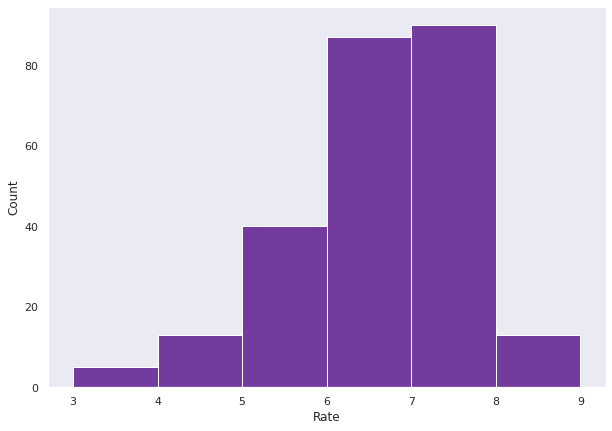

In [104]:
plt.figure(figsize=(10,7))
sns.set(style='dark')
sns.histplot(data=R_Certificate,x=R_Certificate.loc[R_Certificate.Nudity =='Severe']['Rate'],color='indigo',binwidth=1)

Maybe Severe the Nudity highly correlated to Rating.

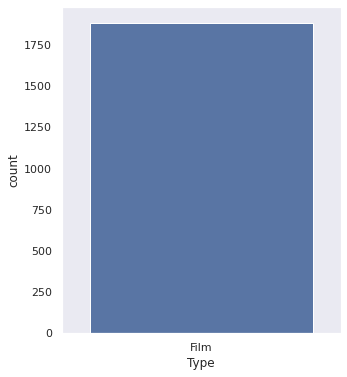

In [43]:
plt.figure(figsize=(5, 6))
plot = sns.countplot(x='Type', data=R_Certificate)

Only films made on R_Certificate. There are no web series.

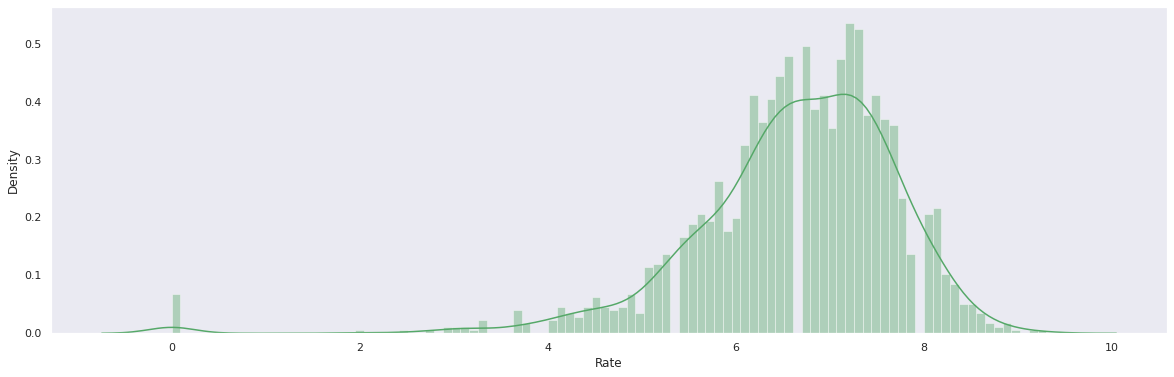

In [49]:
plt.figure(figsize=(20, 6))
plot = sns.distplot(R_Certificate['Rate'], color='g', bins=100)

With this information we can see that the Rating of R_Certificate data are right skewed. Maximum films rated between 6 to 8.

Let's have a look at categorical features "Nudity", "Violence", "Profanity", "Alcohol", and "Frightening".

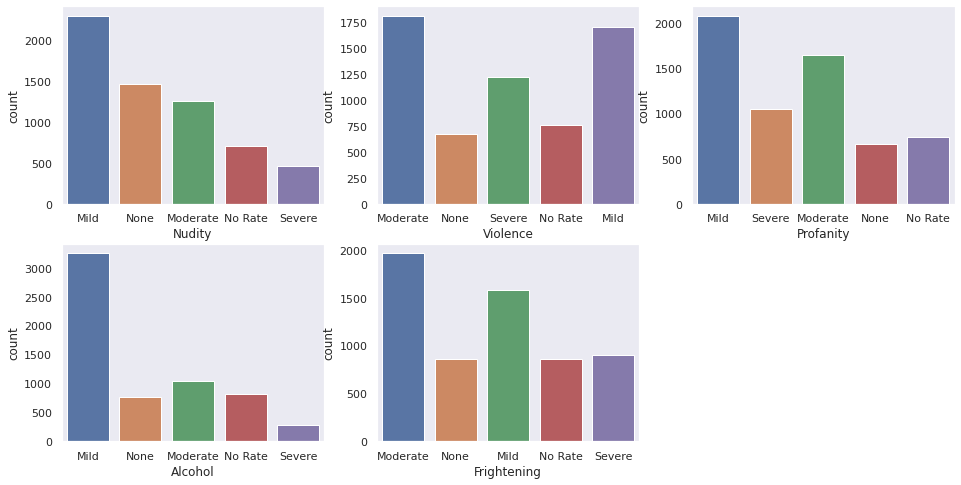

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))


sns.countplot(x='Nudity', data=Imdb_df,ax=axes[0,0])
sns.countplot(x='Violence', data=Imdb_df,ax=axes[0,1])
sns.countplot(x='Profanity', data=Imdb_df,ax=axes[0,2])
sns.countplot(x='Alcohol', data=Imdb_df,ax=axes[1,0])
sns.countplot(x='Frightening', data=Imdb_df,ax=axes[1,1])
#sns.countplot(x='Certificate', data=Imdb_df, ax=axes[1,2])
fig.delaxes(ax=axes[1,2])

# Let's do Bivariate / Multivariate Analysis.

Let's have a look at relation between "Rate" and "Votes" of Imdb_df dataframe.

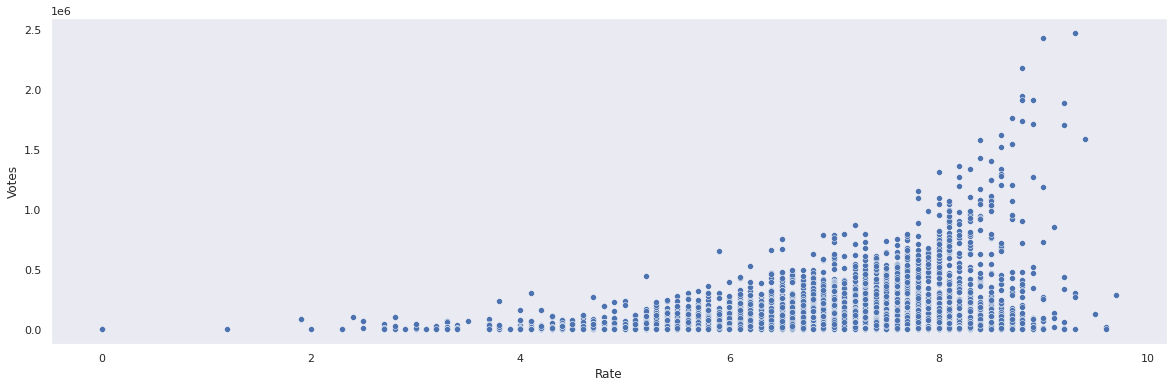

In [53]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=Imdb_df.Rate, y=Imdb_df.Votes);

By the above, we can say that the high rated movie or web series having more votes.

Let's look at the heat map or correlation matrix on Imdb_df dataframe. Correlation is applied on numerical features of dataframe. That is we can understand the relation between pairwise numerical features. Here just ignore the Date feature.

In [57]:
correlations = Imdb_df.corr()

<AxesSubplot:>

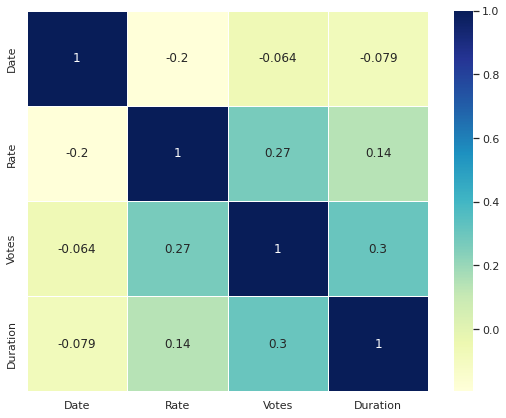

In [58]:
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(correlations, annot=True, cmap="YlGnBu", linewidths=.5)

The Heat map clearly shows how closely ("Rate", "Votes"),("Rate", "Duration"), and ("Votes", "Duration") are related. 

In [61]:
import jovian

In [62]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "azizforai/eda-imdb-movies-series-aziz" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/azizforai/eda-imdb-movies-series-aziz


'https://jovian.ai/azizforai/eda-imdb-movies-series-aziz'

## Asking and Answering Questions

Now let's answer some interesting questions in this section.



#### Q1: Top 10 Films and Web series as per rating.

In [63]:
Top_Rated = Imdb_df.nlargest(10, 'Rate')
Top_Rated

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
1946,Aspirants,2004,9.7,286206.0,Drama,45.0,Series,None,5,No Rate,No Rate,No Rate,No Rate,No Rate
909,The Chosen,2007,9.6,21759.0,"Drama, History",54.0,Series,TV-PG,17,None,None,None,None,Mild
1754,Bluey,2005,9.6,4110.0,"Animation, Family",7.0,Series,TV-Y,147,None,None,None,None,None
2780,Scam 1992: The Harshad Mehta Story,2020,9.5,131914.0,"Biography, Crime, Drama",54.0,Series,TV-14,10,None,None,Mild,Mild,None
52,Breaking Bad,2021,9.4,1593305.0,"Crime, Drama, Thriller",49.0,Series,TV-MA,62,Mild,Severe,Moderate,Severe,Severe
109,The Wire,2021,9.3,306334.0,"Crime, Drama, Thriller",59.0,Series,TV-MA,60,Severe,Severe,Severe,Severe,Severe
201,The Shawshank Redemption,1994,9.3,2474122.0,Drama,142.0,Film,R,-,Mild,Moderate,Severe,Mild,Moderate
500,Avatar: The Last Airbender,1974,9.3,273781.0,"Animation, Action, Adventure",23.0,Series,TV-Y7-FV,62,None,Mild,None,None,Moderate
819,Toma,2021,9.3,5562.0,"Biography, Drama, Music",140.0,Film,None,-,No Rate,No Rate,No Rate,No Rate,No Rate
13,The Sopranos,2021,9.2,340006.0,"Crime, Drama",55.0,Series,TV-MA,86,Severe,Severe,Severe,Severe,Severe


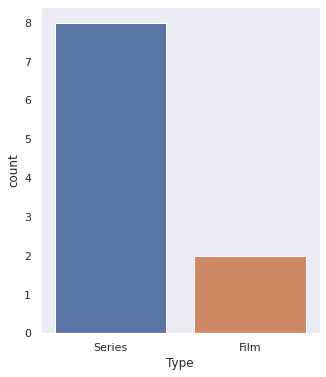

In [64]:
plt.figure(figsize=(5, 6))
plot = sns.countplot(x='Type', data=Top_Rated)

From top 10 rated dataframe, majority are web series =8 and Films = 2 only. That is majority of people showing interest on web series. 

In [68]:
Top_Rated.loc[Top_Rated.Type=='Series']['Name']

1946                             Aspirants
909                             The Chosen
1754                                 Bluey
2780    Scam 1992: The Harshad Mehta Story
52                            Breaking Bad
109                               The Wire
500             Avatar: The Last Airbender
13                            The Sopranos
Name: Name, dtype: object

In [69]:
Top_Rated.loc[Top_Rated.Type=='Film']['Name']

201    The Shawshank Redemption
819                        Toma
Name: Name, dtype: object

#### Q2: Top 10 Films as per rating and voting

In [71]:
Flim_df = Imdb_df.loc[Imdb_df.Type=='Film']
Flim_df.head(5)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163.0,"Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375.0,"Crime, Drama, Thriller",90.0,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,27145.0,"Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443.0,"Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636.0,"Action, Adventure, Drama",155.0,Film,PG-13,-,None,Moderate,None,Mild,Moderate


Top 10 films as per rating.

In [72]:
Top_Rated_Flims = Flim_df.nlargest(10, 'Rate')
Top_Rated_Flims['Name']

201     The Shawshank Redemption
819                         Toma
251                The Godfather
3611                Sardar Udham
270              The Dark Knight
839                 12 Angry Men
929       The Godfather: Part II
2742            Chal Mera Putt 2
320                 Pulp Fiction
555             Schindler's List
Name: Name, dtype: object

Top 10 films as per voting.

In [73]:
Top_Rated_Flims = Flim_df.nlargest(10, 'Votes')
Top_Rated_Flims['Name']

201                             The Shawshank Redemption
270                                      The Dark Knight
318                                            Inception
339                                           Fight Club
320                                         Pulp Fiction
435                                         Forrest Gump
195                                           The Matrix
341    The Lord of the Rings: The Fellowship of the Ring
816        The Lord of the Rings: The Return of the King
251                                        The Godfather
Name: Name, dtype: object

#### Q3: Top 10 web series as per rating and voting.

In [75]:
Series_df = Imdb_df.loc[Imdb_df.Type=='Series']
Series_df.head(5)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
5,Ted Lasso,2021,8.8,117562.0,"Comedy, Drama, Sport",30.0,Series,TV-MA,23,Mild,None,Severe,Mild,None
7,House of the Dragon,2021,0.0,0.0,"Action, Adventure, Drama",0.0,Series,None,10,No Rate,No Rate,No Rate,No Rate,No Rate
8,What If...?,2021,7.6,51959.0,"Animation, Action, Adventure",0.0,Series,TV-14,18,None,Moderate,Mild,Mild,Moderate
9,Sex Education,2021,8.3,220201.0,"Comedy, Drama",45.0,Series,TV-MA,25,Severe,Mild,Severe,Moderate,Mild
10,The Walking Dead,2021,8.2,906327.0,"Drama, Horror, Thriller",44.0,Series,TV-14,177,Mild,Severe,Moderate,Mild,Severe


Top 10 web series as per rating

In [76]:
Top_Rated_Series = Series_df.nlargest(10, 'Rate')
Top_Rated_Series['Name']

1946                             Aspirants
909                             The Chosen
1754                                 Bluey
2780    Scam 1992: The Harshad Mehta Story
52                            Breaking Bad
109                               The Wire
500             Avatar: The Last Airbender
13                            The Sopranos
18                         Game of Thrones
96                          Rick and Morty
Name: Name, dtype: object

Top 10 web series as per voting

In [78]:
Top_Voted_Series = Series_df.nlargest(10, 'Votes')
Top_Voted_Series['Name']

18           Game of Thrones
52              Breaking Bad
49           Stranger Things
10          The Walking Dead
69                   Friends
306                 Sherlock
108      The Big Bang Theory
83                    Dexter
150    How I Met Your Mother
182           True Detective
Name: Name, dtype: object

#### Q4: Top 10 most liked Genre by people.

In [90]:
most_liked=Imdb_df[Imdb_df['Rate']>=9.0]
most_liked.shape

(33, 14)

In [91]:
most_liked_per=(most_liked['Genre'].value_counts())/(Imdb_df['Genre'].value_counts())*100
most_liked_per.head(20)

Action                               NaN
Action, Adventure                    NaN
Action, Adventure, Biography         NaN
Action, Adventure, Comedy            NaN
Action, Adventure, Crime             NaN
Action, Adventure, Drama        0.714286
Action, Adventure, Family            NaN
Action, Adventure, Fantasy           NaN
Action, Adventure, History           NaN
Action, Adventure, Horror            NaN
Action, Adventure, Mystery           NaN
Action, Adventure, Romance           NaN
Action, Adventure, Sci-Fi            NaN
Action, Adventure, Thriller          NaN
Action, Adventure, Western           NaN
Action, Biography, Crime             NaN
Action, Biography, Drama             NaN
Action, Comedy                       NaN
Action, Comedy, Crime                NaN
Action, Comedy, Drama                NaN
Name: Genre, dtype: float64

In [93]:
most_liked_per.sort_values(ascending =False).head(10)

Comedy, Game-Show               100.000000
Animation, Family               100.000000
Animation, Crime, Drama          50.000000
Adventure, Fantasy               40.000000
Documentary, Reality-TV          16.666667
Adventure, Drama, Sci-Fi         12.500000
Biography, Drama, Music           7.142857
Drama, History                    6.666667
Crime, Drama                      5.000000
Animation, Action, Adventure      4.629630
Name: Genre, dtype: float64

In [96]:
import jovian

In [97]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "azizforai/eda-imdb-movies-series-aziz" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/azizforai/eda-imdb-movies-series-aziz


'https://jovian.ai/azizforai/eda-imdb-movies-series-aziz'

## Inferences and Conclusion

#### Inferences 
    The following inferences made by this work.
        1) Maybe Severe the Nudity highly correlated to Rating.
        2) It is shown that the high rated movie or web series having more votes.
        3) The Heat map clearly shows how closely ("Rate", "Votes"),("Rate", "Duration"), and ("Votes", "Duration") are related.
        4) The majority of people showing interest on web series.
#### Conclusion
    In this Notebook, we saw the most important subjects for any type of analysis. We saw how to clean and preprocess the data depends on the domain of dataset and features.
    We saw how to do univariate and bivariate/multivariate analysis by using Visualization.
    And, at the end we answered some interesting questions.

In [105]:
import jovian

In [106]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "azizforai/eda-imdb-movies-series-aziz" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/azizforai/eda-imdb-movies-series-aziz


'https://jovian.ai/azizforai/eda-imdb-movies-series-aziz'

## References and Future Work

Till now we did data cleaning, preprocessing, and did some EDA. Now we got some understanding that, how the data is behaving.
As a future work, we use this processed data for **Machine Learning** model prediction. 
    On this data, 
        1) We can predict rating of a new movie based on other features.
        2) By doing some more processing on "Genre" feature and classify the "Genre" for new movie.
This is the some future work I noted at this point. 
>
Once again thank you to course instructor Mr. Aakash N S for providing such a nice course [Data Analysis with Python: Zero to Pandas](zerotopandas.com).
>
    

In [3]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>